In [1]:
pip install statsmodels
#  To update, run: python.exe -m pip install --upgrade pip

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


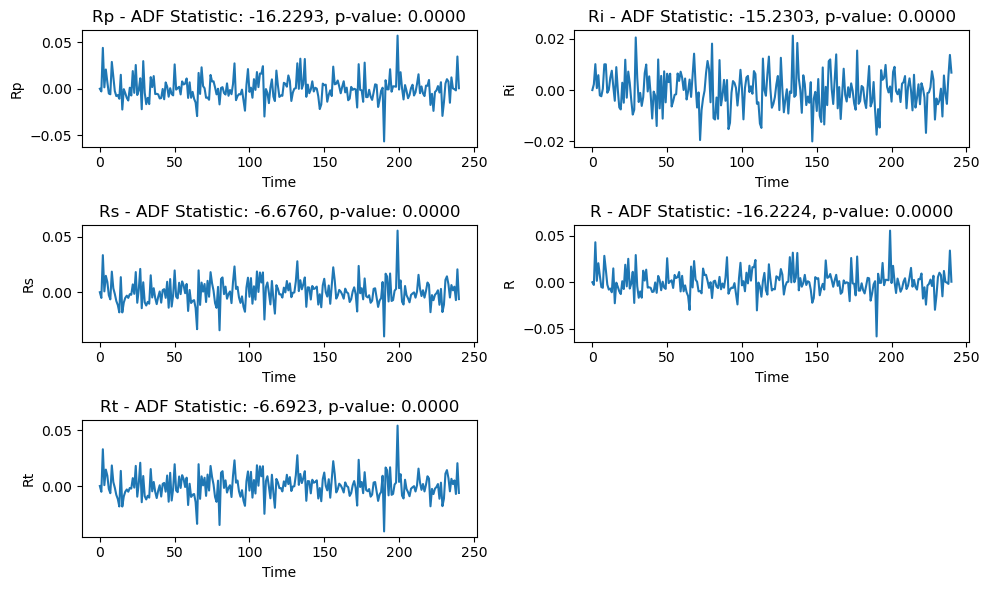

In [ ]:
#平稳性检验：这决定了后续时序模型的有效性与否
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('raw_data.csv')

# 定义要进行平稳性检验的列名列表
columns_to_test = ['Rp', 'Ri', 'Rs', 'R', 'Rt']

# 存储平稳性检验结果的字典
results_dict = {}

# 对每一列进行平稳性检验
for column in columns_to_test:
    data = df[column]
    result = adfuller(data)
    results_dict[column] = result


# 可视化平稳性检验结果
plt.figure(figsize=(10, 6))

for i, column in enumerate(columns_to_test):
    result = results_dict[column]
    plt.subplot(3, 2, i + 1)
    plt.plot(df[column])
    plt.title(f'{column} - ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}')
    plt.xlabel('Time')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

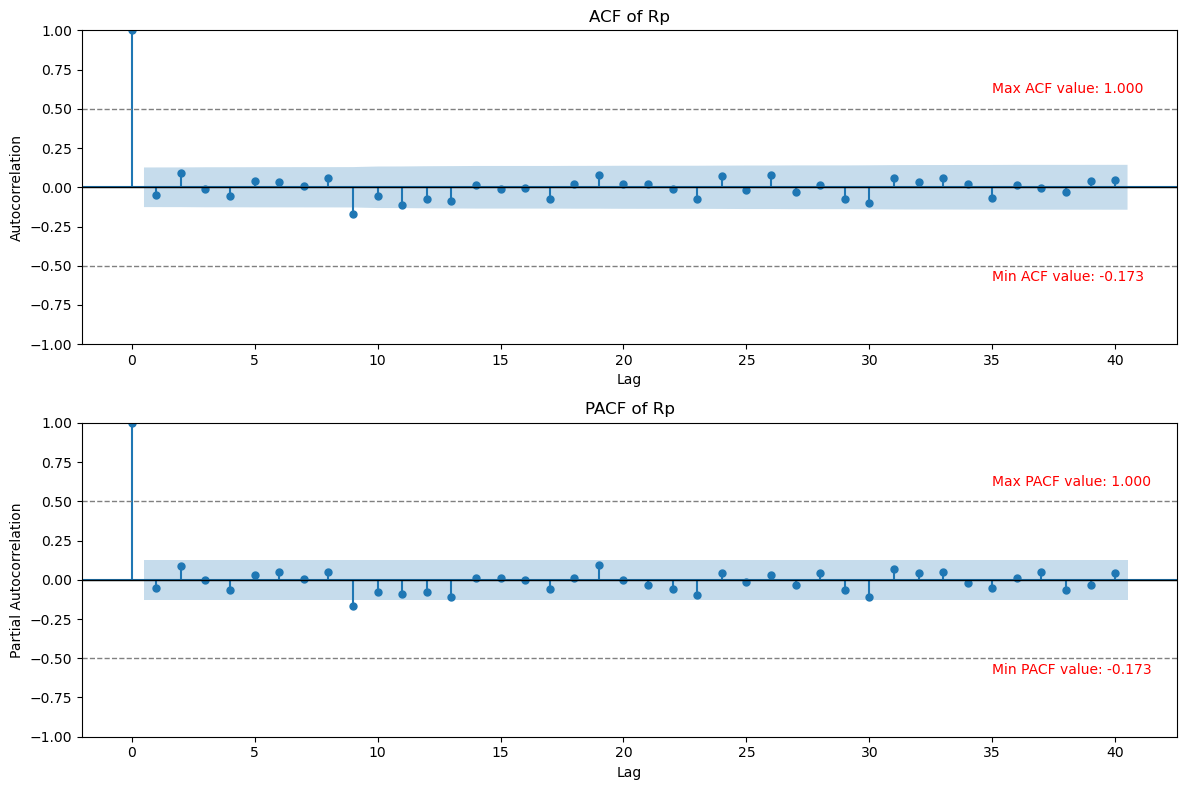

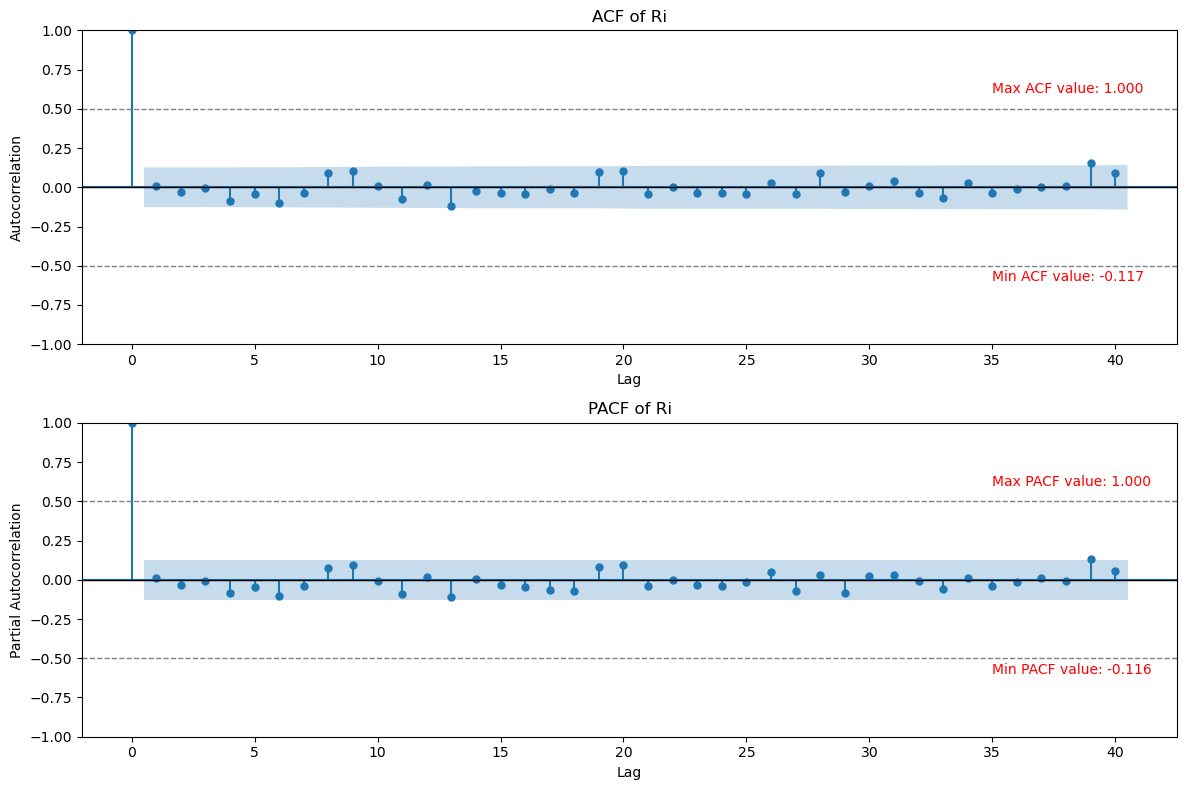

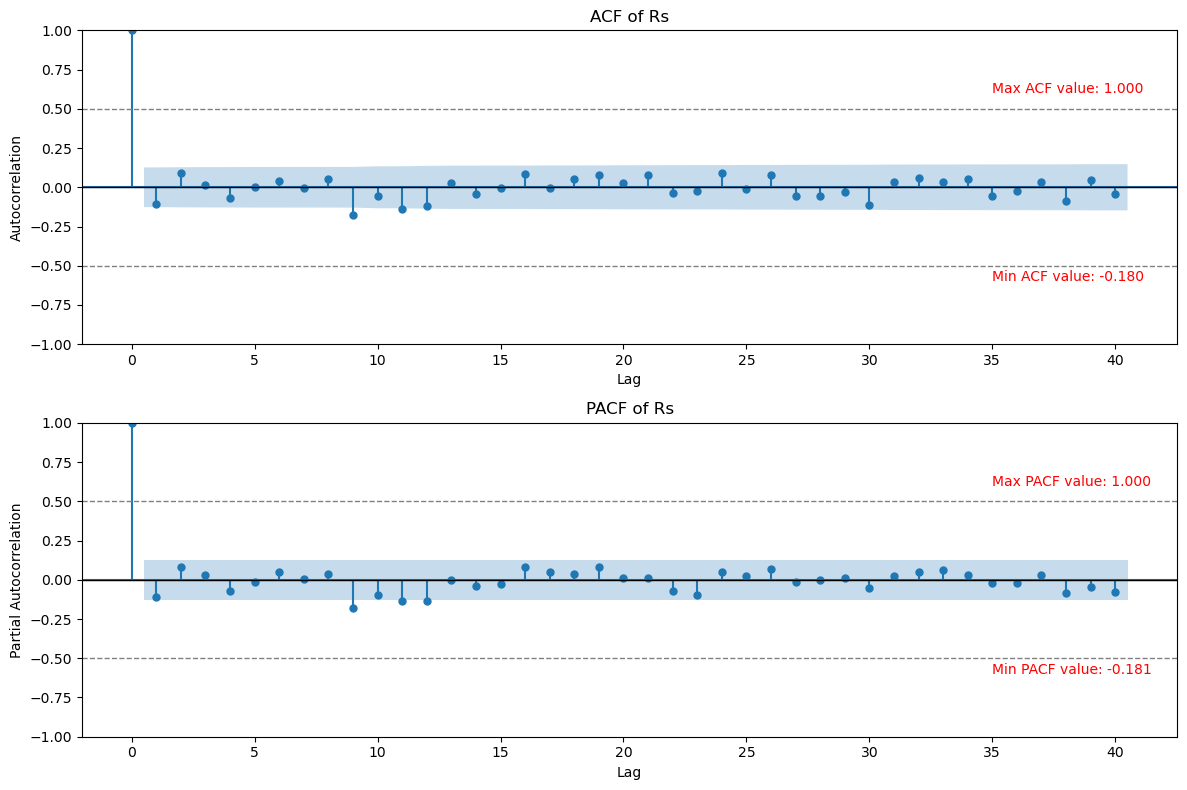

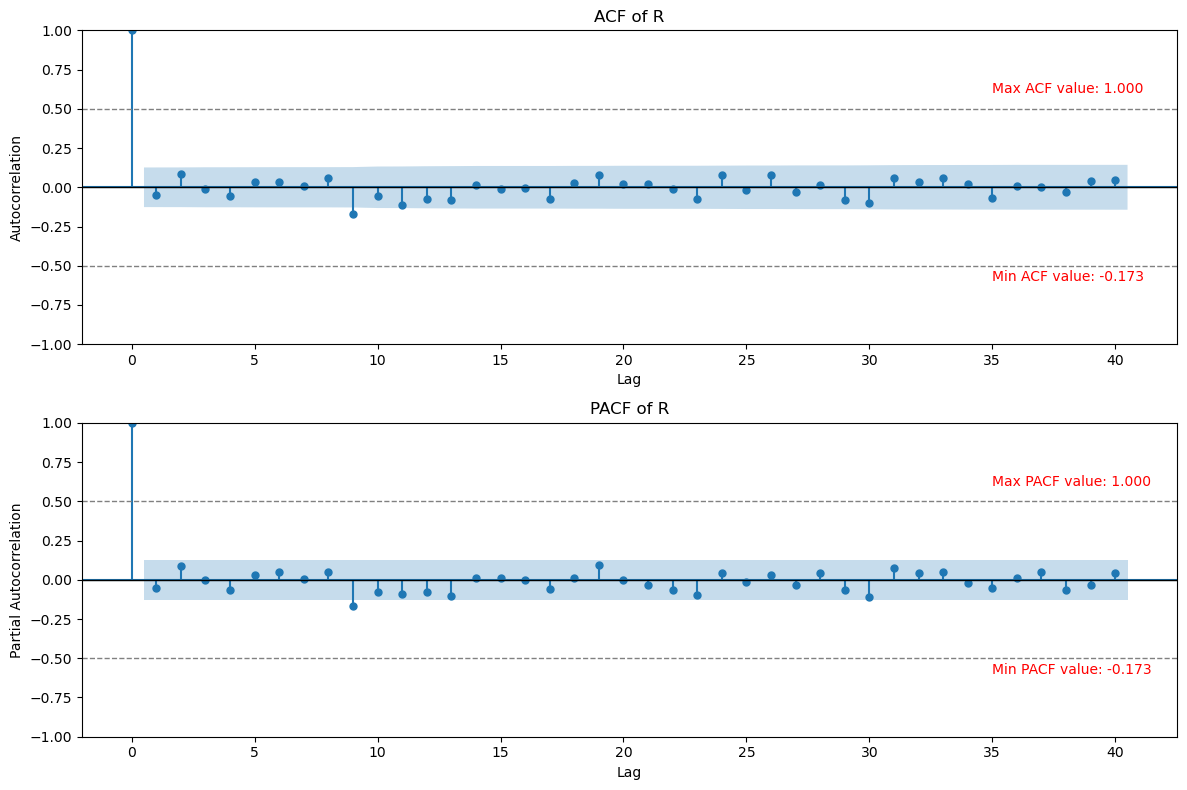

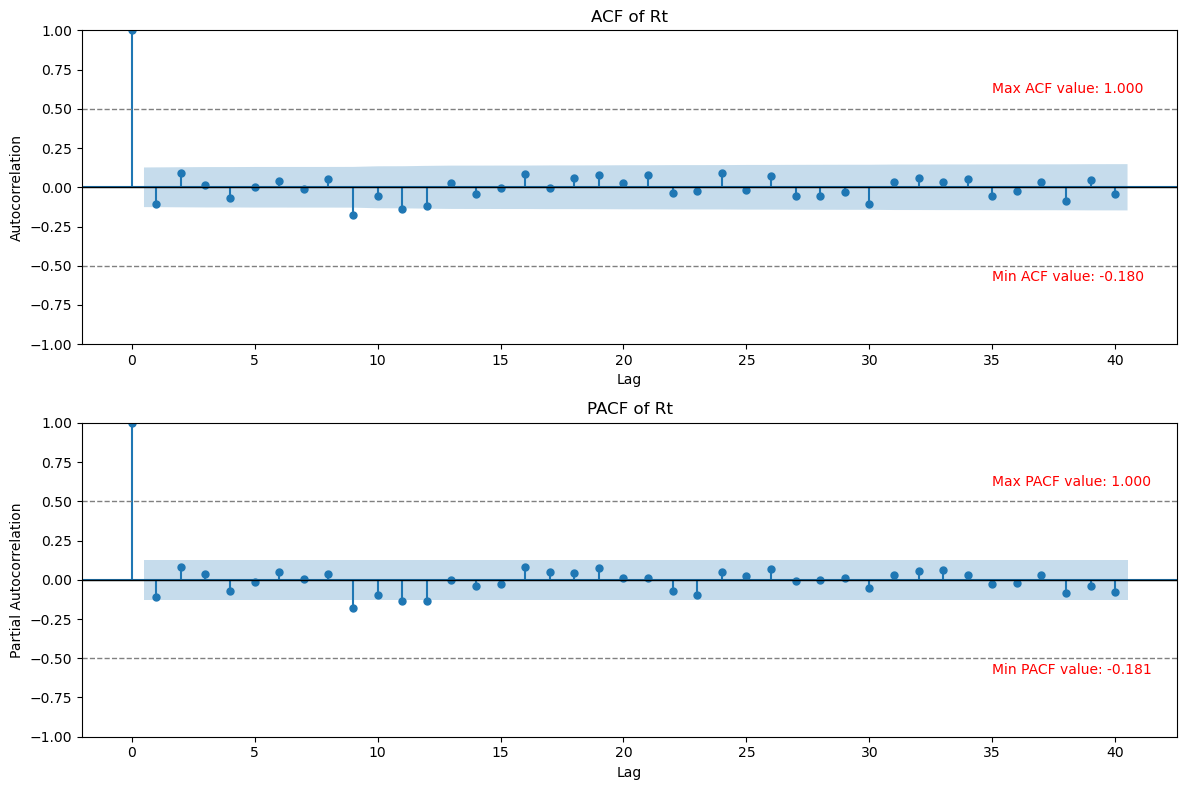

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf


# 读取数据
df = pd.read_csv('raw_data.csv')

# 定义要进行分析的列名列表
columns_to_test = ['Rp', 'Ri', 'Rs', 'R', 'Rt']

# 绘制每一列的ACF和PACF图
for column in columns_to_test:
    data = df[column]

    plt.figure(figsize=(12, 8))

    # 绘制ACF图
    plt.subplot(2, 1, 1)
    acf_values = acf(data, nlags=40, fft=False)  # 计算ACF值，设置nlags为40以查看更多滞后阶数
    plot_acf(data, lags=40, ax=plt.gca(), alpha=0.05)  # 绘制ACF图，设置lags为40，alpha为0.05用于显示置信区间
    plt.title(f'ACF of {column}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.axhline(y=0, color='black', lw=1)  # 绘制水平直线表示零轴
    plt.axhline(y=0.5, color='gray', lw=1, linestyle='--')  # 绘制参考线（可根据需要调整位置）
    plt.axhline(y=-0.5, color='gray', lw=1, linestyle='--')
    plt.text(35, 0.6, f'Max ACF value: {np.max(acf_values):.3f}', color='red')  # 显示最大ACF值
    plt.text(35, -0.6, f'Min ACF value: {np.min(acf_values):.3f}', color='red')  # 显示最小ACF值

    # 绘制PACF图
    plt.subplot(2, 1, 2)
    pacf_values = pacf(data, nlags=40, method='ols')  # 计算PACF值，设置nlags为40并使用普通最小二乘法（OLS）
    plot_pacf(data, lags=40, ax=plt.gca(), alpha=0.05)  # 绘制PACF图，设置lags为40，alpha为0.05用于显示置信区间
    plt.title(f'PACF of {column}')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.axhline(y=0, color='black', lw=1)  # 绘制水平直线表示零轴
    plt.axhline(y=0.5, color='gray', lw=1, linestyle='--')  # 绘制参考线（可根据需要调整位置）
    plt.axhline(y=-0.5, color='gray', lw=1, linestyle='--')
    plt.text(35, 0.6, f'Max PACF value: {np.max(pacf_values):.3f}', color='red')  # 显示最大PACF值
    plt.text(35, -0.6, f'Min PACF value: {np.min(pacf_values):.3f}', color='red')  # 显示最小PACF值

    plt.tight_layout()
    plt.show()

d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoreg

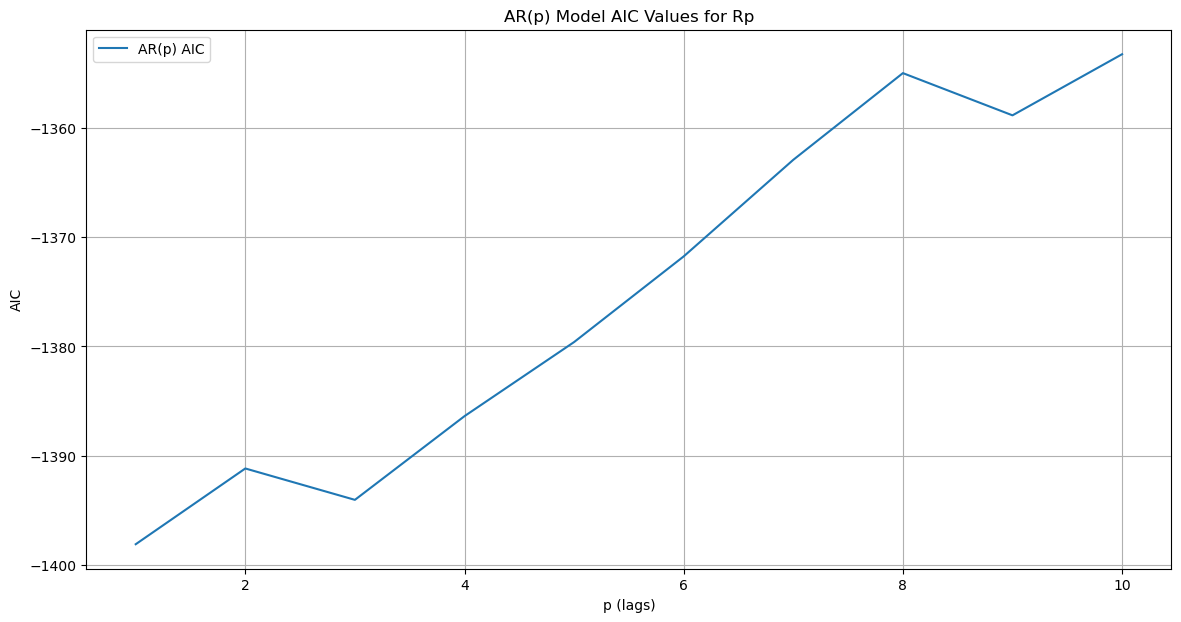

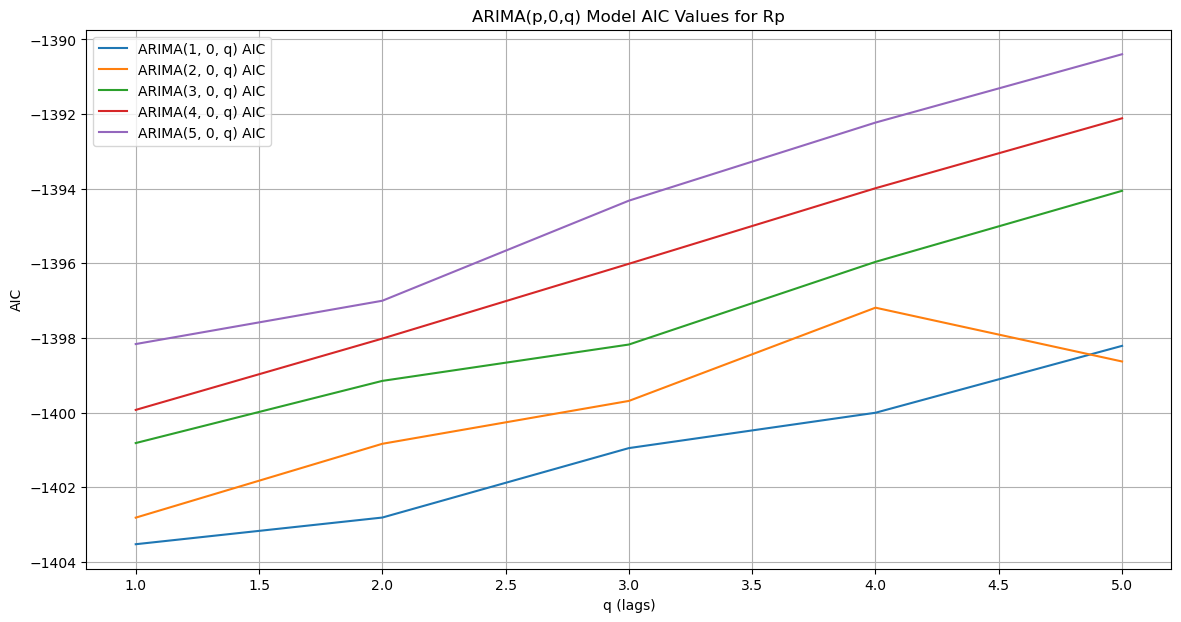

In [ ]:
# Rp的定阶
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# 读取数据
raw_data = pd.read_csv('raw_data.csv')

# 选择观测列并去掉缺失值
series = raw_data['Rp'].dropna()

# 存储AIC值
aic_ar = []
aic_arima = {}

# 设置最大阶数
max_ar_p = 10  # AR(p)的最大阶数
max_arima_pq = 5  # ARIMA(p,0,q)中p和q的最大阶数

# 计算AR(p)模型的AIC
for p in range(1, max_ar_p + 1):  # AR(p)的阶数不超过10
    try:
        model_ar = AutoReg(series, lags=p).fit()
        aic_ar.append(model_ar.aic)
    except Exception as e:
        aic_ar.append(np.nan)

# 计算ARIMA(p,0,q)模型的AIC
for p in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中p不超过5
    aic_arima[p] = []  # 为每个p创建一个列表来存储不同q值的AIC
    for q in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中q不超过5
        try:
            model_arima = ARIMA(series, order=(p, 0, q)).fit()
            aic_arima[p].append(model_arima.aic)
        except Exception as e:
            aic_arima[p].append(np.nan)

# 绘制AR(p)的AIC变化图
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_ar_p + 1), aic_ar, label='AR(p) AIC')
plt.title('AR(p) Model AIC Values for Rp')
plt.xlabel('p (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()

# 绘制ARIMA(p,0,q)的AIC变化图
plt.figure(figsize=(14, 7))

# 为每个p绘制对应的q值的AIC变化图
for p in range(1, max_arima_pq + 1):
    plt.plot(range(1, max_arima_pq + 1), aic_arima[p], label=f'ARIMA({p}, 0, q) AIC')

plt.title('ARIMA(p,0,q) Model AIC Values for Rp')
plt.xlabel('q (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()


d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarni

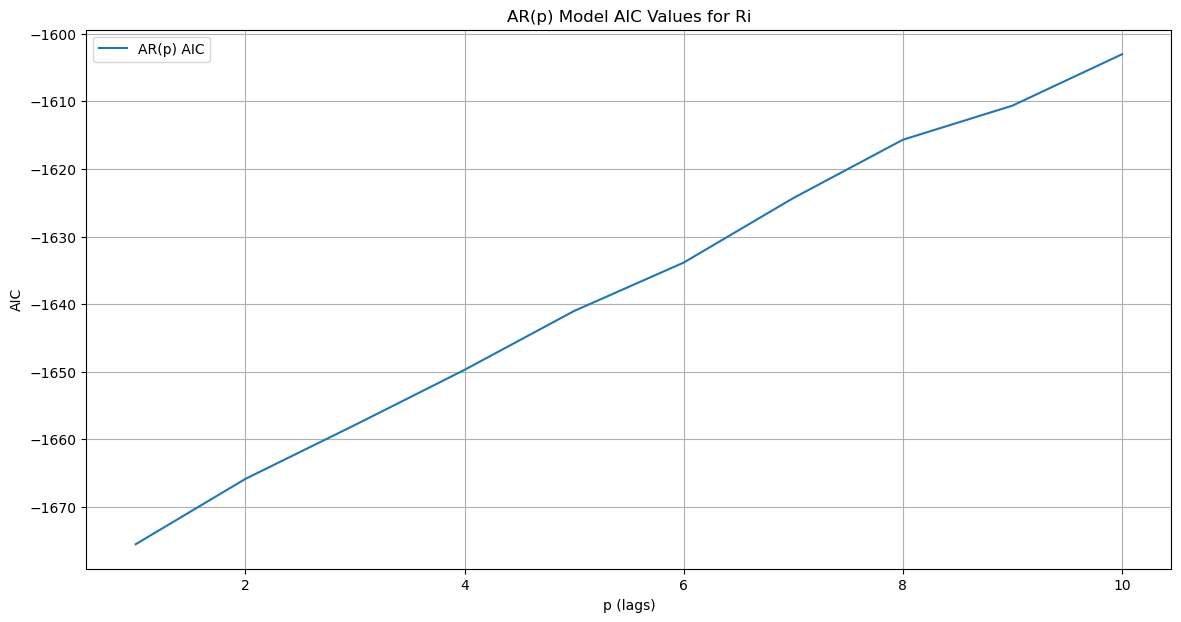

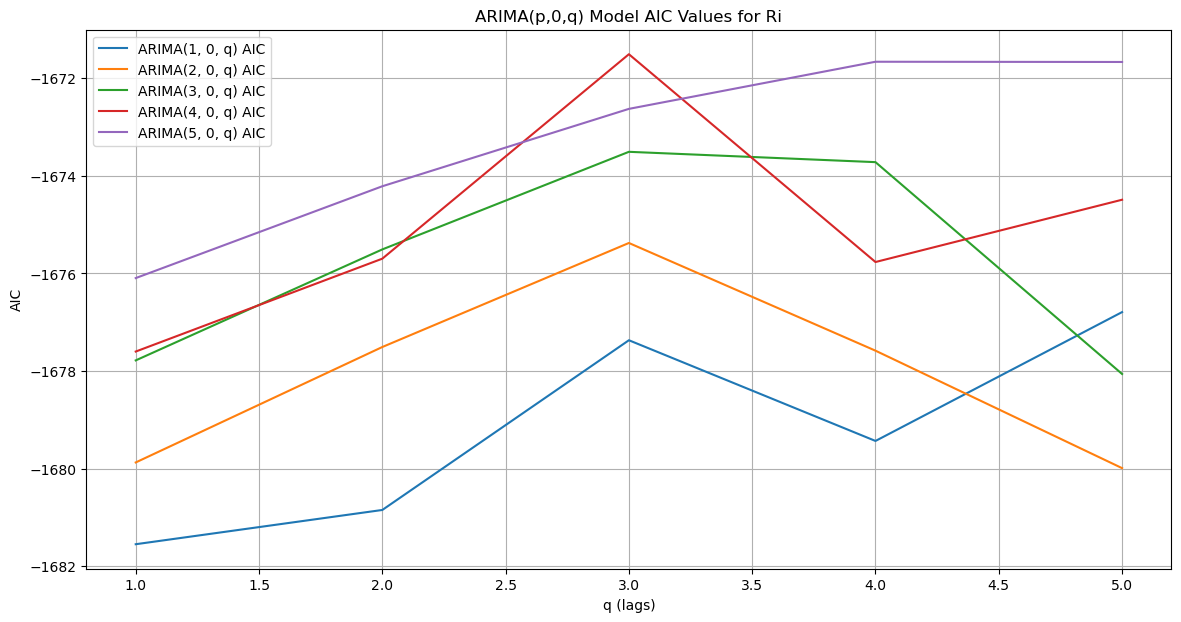

In [ ]:
# Ri的定阶
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# 读取数据
raw_data = pd.read_csv('raw_data.csv')

# 选择观测列并去掉缺失值
series = raw_data['Ri'].dropna()

# 存储AIC值
aic_ar = []
aic_arima = {}

# 设置最大阶数
max_ar_p = 10  # AR(p)的最大阶数
max_arima_pq = 5  # ARIMA(p,0,q)中p和q的最大阶数

# 计算AR(p)模型的AIC
for p in range(1, max_ar_p + 1):  # AR(p)的阶数不超过10
    try:
        model_ar = AutoReg(series, lags=p).fit()
        aic_ar.append(model_ar.aic)
    except Exception as e:
        aic_ar.append(np.nan)

# 计算ARIMA(p,0,q)模型的AIC
for p in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中p不超过5
    aic_arima[p] = []  # 为每个p创建一个列表来存储不同q值的AIC
    for q in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中q不超过5
        try:
            model_arima = ARIMA(series, order=(p, 0, q)).fit()
            aic_arima[p].append(model_arima.aic)
        except Exception as e:
            aic_arima[p].append(np.nan)

# 绘制AR(p)的AIC变化图
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_ar_p + 1), aic_ar, label='AR(p) AIC')
plt.title('AR(p) Model AIC Values for Ri')
plt.xlabel('p (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()

# 绘制ARIMA(p,0,q)的AIC变化图
plt.figure(figsize=(14, 7))

# 为每个p绘制对应的q值的AIC变化图
for p in range(1, max_arima_pq + 1):
    plt.plot(range(1, max_arima_pq + 1), aic_arima[p], label=f'ARIMA({p}, 0, q) AIC')

plt.title('ARIMA(p,0,q) Model AIC Values for Ri')
plt.xlabel('q (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()


d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. C

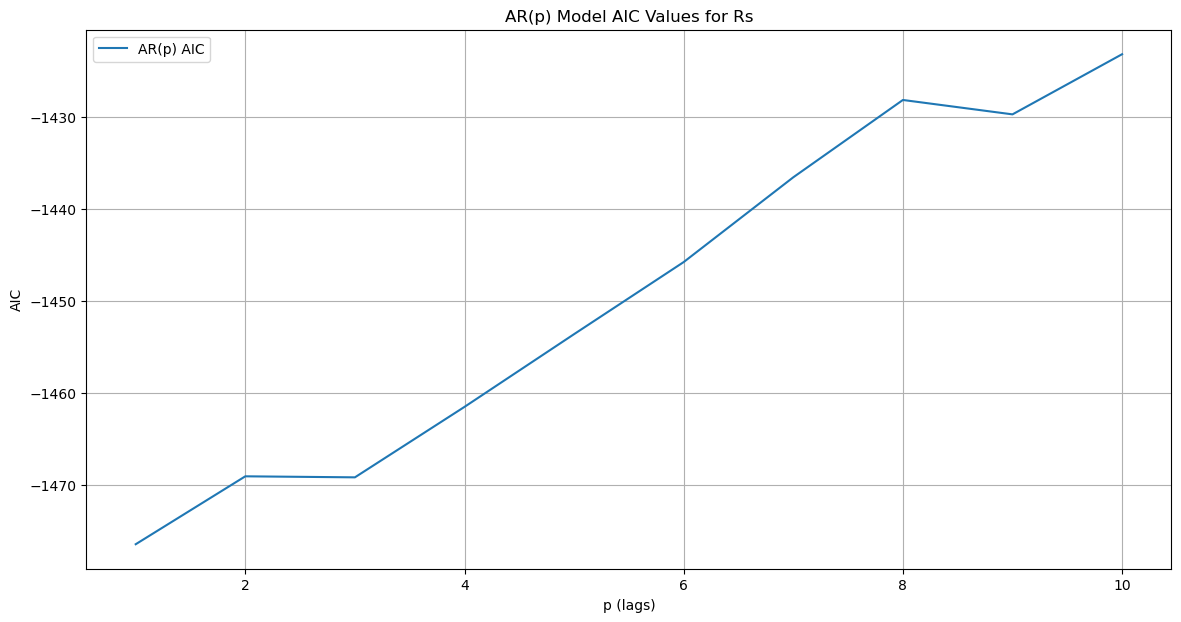

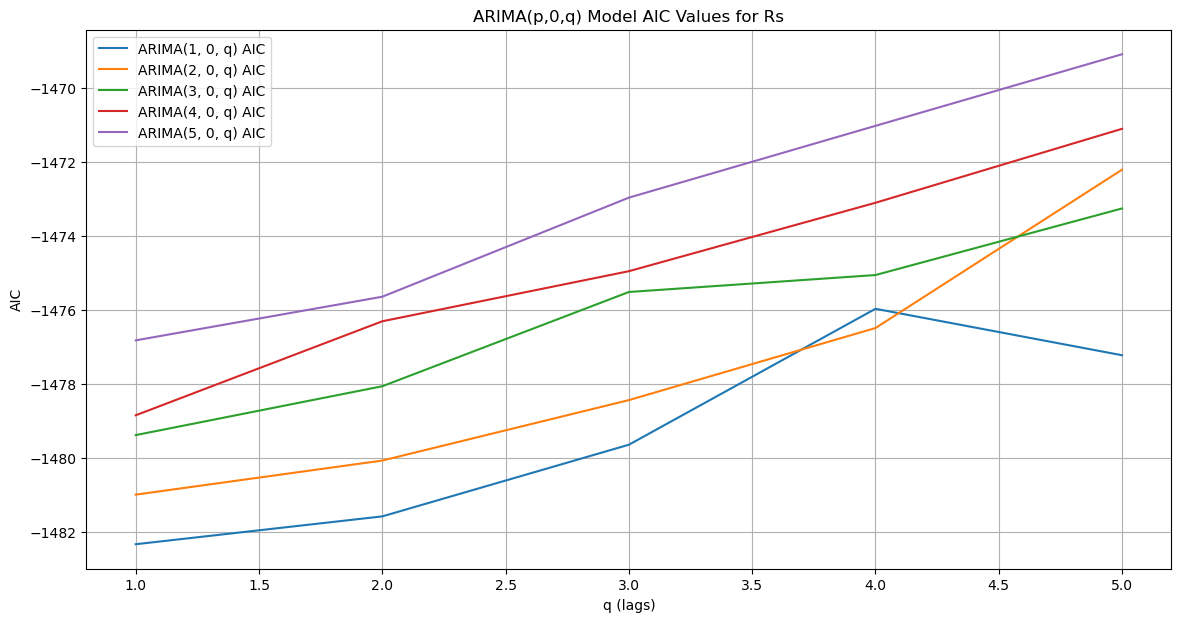

In [23]:
# Rs的定阶
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# 读取数据
raw_data = pd.read_csv('raw_data.csv')

# 选择观测列并去掉缺失值
series = raw_data['Rs'].dropna()

# 存储AIC值
aic_ar = []
aic_arima = {}

# 设置最大阶数
max_ar_p = 10  # AR(p)的最大阶数
max_arima_pq = 5  # ARIMA(p,0,q)中p和q的最大阶数

# 计算AR(p)模型的AIC
for p in range(1, max_ar_p + 1):  # AR(p)的阶数不超过10
    try:
        model_ar = AutoReg(series, lags=p).fit()
        aic_ar.append(model_ar.aic)
    except Exception as e:
        aic_ar.append(np.nan)

# 计算ARIMA(p,0,q)模型的AIC
for p in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中p不超过5
    aic_arima[p] = []  # 为每个p创建一个列表来存储不同q值的AIC
    for q in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中q不超过5
        try:
            model_arima = ARIMA(series, order=(p, 0, q)).fit()
            aic_arima[p].append(model_arima.aic)
        except Exception as e:
            aic_arima[p].append(np.nan)

# 绘制AR(p)的AIC变化图
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_ar_p + 1), aic_ar, label='AR(p) AIC')
plt.title('AR(p) Model AIC Values for Rs')
plt.xlabel('p (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()

# 绘制ARIMA(p,0,q)的AIC变化图
plt.figure(figsize=(14, 7))

# 为每个p绘制对应的q值的AIC变化图
for p in range(1, max_arima_pq + 1):
    plt.plot(range(1, max_arima_pq + 1), aic_arima[p], label=f'ARIMA({p}, 0, q) AIC')

plt.title('ARIMA(p,0,q) Model AIC Values for Rs')
plt.xlabel('q (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()


d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoreg

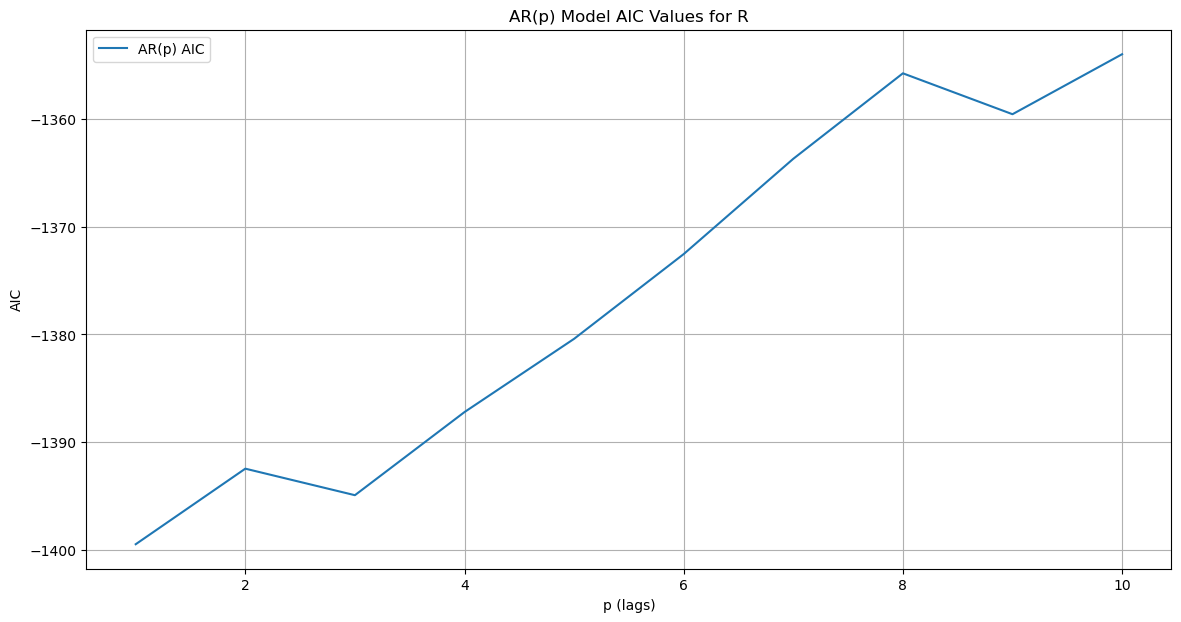

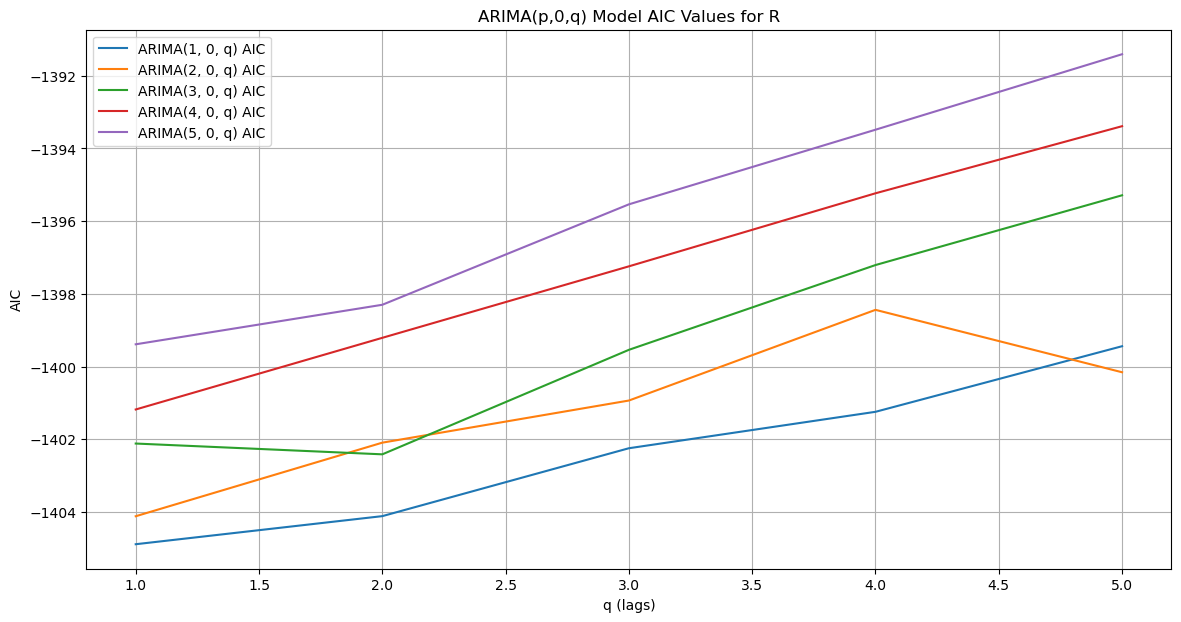

In [24]:
# R的定阶
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# 读取数据
raw_data = pd.read_csv('raw_data.csv')

# 选择观测列并去掉缺失值
series = raw_data['R'].dropna()

# 存储AIC值
aic_ar = []
aic_arima = {}

# 设置最大阶数
max_ar_p = 10  # AR(p)的最大阶数
max_arima_pq = 5  # ARIMA(p,0,q)中p和q的最大阶数

# 计算AR(p)模型的AIC
for p in range(1, max_ar_p + 1):  # AR(p)的阶数不超过10
    try:
        model_ar = AutoReg(series, lags=p).fit()
        aic_ar.append(model_ar.aic)
    except Exception as e:
        aic_ar.append(np.nan)

# 计算ARIMA(p,0,q)模型的AIC
for p in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中p不超过5
    aic_arima[p] = []  # 为每个p创建一个列表来存储不同q值的AIC
    for q in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中q不超过5
        try:
            model_arima = ARIMA(series, order=(p, 0, q)).fit()
            aic_arima[p].append(model_arima.aic)
        except Exception as e:
            aic_arima[p].append(np.nan)

# 绘制AR(p)的AIC变化图
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_ar_p + 1), aic_ar, label='AR(p) AIC')
plt.title('AR(p) Model AIC Values for R')
plt.xlabel('p (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()

# 绘制ARIMA(p,0,q)的AIC变化图
plt.figure(figsize=(14, 7))

# 为每个p绘制对应的q值的AIC变化图
for p in range(1, max_arima_pq + 1):
    plt.plot(range(1, max_arima_pq + 1), aic_arima[p], label=f'ARIMA({p}, 0, q) AIC')

plt.title('ARIMA(p,0,q) Model AIC Values for R')
plt.xlabel('q (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()


d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

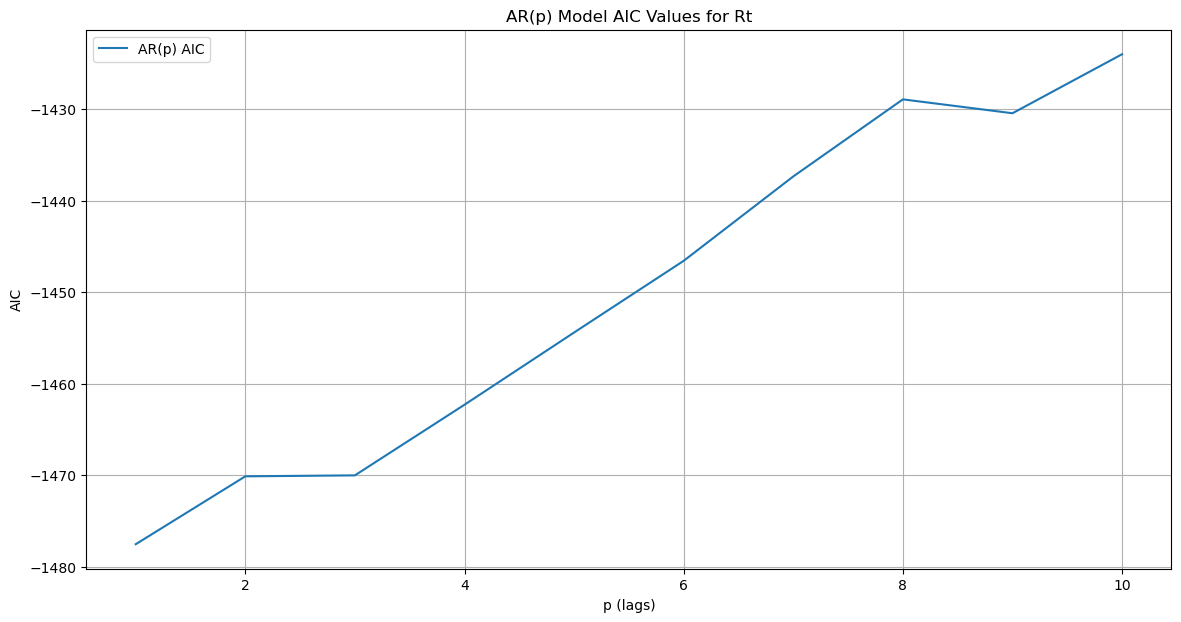

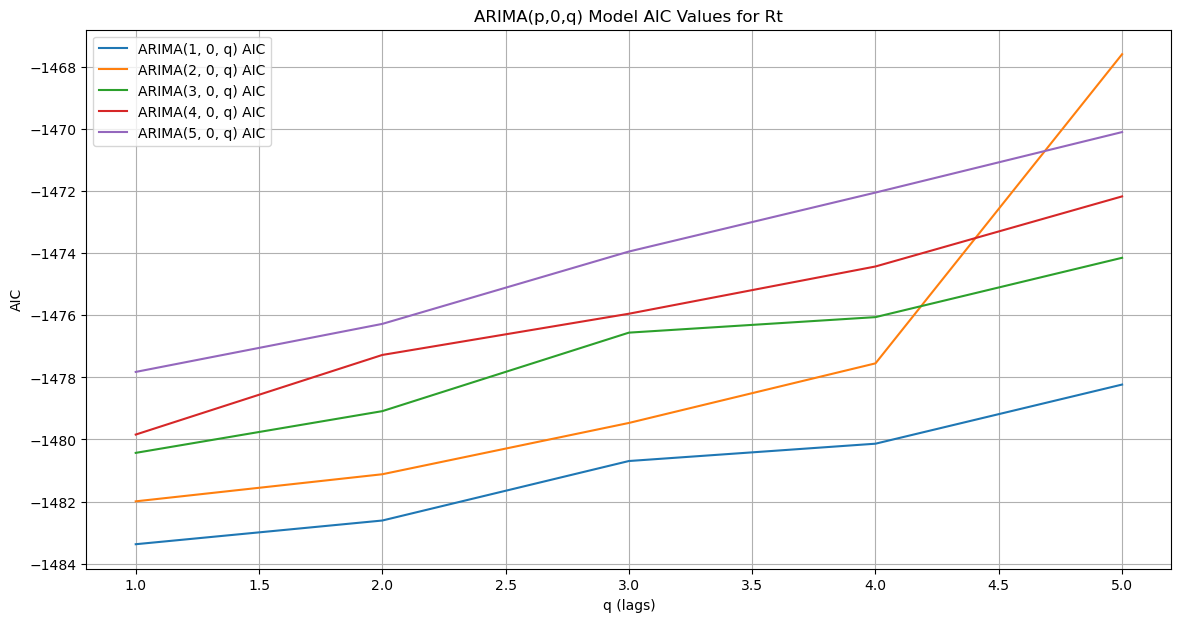

In [25]:
# Rt的定阶
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# 读取数据
raw_data = pd.read_csv('raw_data.csv')

# 选择观测列并去掉缺失值
series = raw_data['Rt'].dropna()

# 存储AIC值
aic_ar = []
aic_arima = {}

# 设置最大阶数
max_ar_p = 10  # AR(p)的最大阶数
max_arima_pq = 5  # ARIMA(p,0,q)中p和q的最大阶数

# 计算AR(p)模型的AIC
for p in range(1, max_ar_p + 1):  # AR(p)的阶数不超过10
    try:
        model_ar = AutoReg(series, lags=p).fit()
        aic_ar.append(model_ar.aic)
    except Exception as e:
        aic_ar.append(np.nan)

# 计算ARIMA(p,0,q)模型的AIC
for p in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中p不超过5
    aic_arima[p] = []  # 为每个p创建一个列表来存储不同q值的AIC
    for q in range(1, max_arima_pq + 1):  # ARIMA(p,0,q)中q不超过5
        try:
            model_arima = ARIMA(series, order=(p, 0, q)).fit()
            aic_arima[p].append(model_arima.aic)
        except Exception as e:
            aic_arima[p].append(np.nan)

# 绘制AR(p)的AIC变化图
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_ar_p + 1), aic_ar, label='AR(p) AIC')
plt.title('AR(p) Model AIC Values for Rt')
plt.xlabel('p (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()

# 绘制ARIMA(p,0,q)的AIC变化图
plt.figure(figsize=(14, 7))

# 为每个p绘制对应的q值的AIC变化图
for p in range(1, max_arima_pq + 1):
    plt.plot(range(1, max_arima_pq + 1), aic_arima[p], label=f'ARIMA({p}, 0, q) AIC')

plt.title('ARIMA(p,0,q) Model AIC Values for Rt')
plt.xlabel('q (lags)')
plt.ylabel('AIC')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#AR的参数估计
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# 读取数据
raw_data = pd.read_csv('raw_data.csv')

# 选择五列时间序列
columns = ['Rp', 'Ri', 'Rs', 'R', 'Rt']
coefficients = {}

# 对每列数据使用AR(3)模型拟合，并计算自回归系数
for col in columns:
    series = raw_data[col].dropna()  # 去掉缺失值
    model = AutoReg(series, lags=3)  # 使用AR(3)模型
    model_fitted = model.fit()
    
    # 获取自回归系数并存入字典
    coefficients[col] = model_fitted.params

# 将系数结果转换为DataFrame
coefficients_df = pd.DataFrame(coefficients)

# 打印出所有列的AR(3)自回归系数
print(coefficients_df)


       Rp        Ri        Rs        R         Rt      
R.L1        NaN       NaN       NaN -0.042651       NaN
R.L2        NaN       NaN       NaN  0.087702       NaN
R.L3        NaN       NaN       NaN -0.000378       NaN
Ri.L1       NaN  0.008710       NaN       NaN       NaN
Ri.L2       NaN -0.031870       NaN       NaN       NaN
Ri.L3       NaN -0.007663       NaN       NaN       NaN
Rp.L1 -0.042827       NaN       NaN       NaN       NaN
Rp.L2  0.089515       NaN       NaN       NaN       NaN
Rp.L3 -0.000385       NaN       NaN       NaN       NaN
Rs.L1       NaN       NaN -0.095382       NaN       NaN
Rs.L2       NaN       NaN  0.084794       NaN       NaN
Rs.L3       NaN       NaN  0.031866       NaN       NaN
Rt.L1       NaN       NaN       NaN       NaN -0.096738
Rt.L2       NaN       NaN       NaN       NaN  0.084203
Rt.L3       NaN       NaN       NaN       NaN  0.033401
const -0.000088 -0.000228  0.000133 -0.000165  0.000074


In [ ]:
#ARMA参数估计

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 读取数据
raw_data = pd.read_csv('raw_data.csv')

# 模型参数设定
models = {
    'Rp': (2, 0, 2),
    'Ri': (1, 0, 2),
    'Rs': (2, 0, 2),
    'R':  (3, 0, 2),
    'Rt': (2, 0, 2)
}

# 存储结果的字典
coefficients = {}

# 对每列数据使用指定的ARIMA模型拟合，并计算系数
for col, order in models.items():
    series = raw_data[col].dropna()  # 去掉缺失值
    model = ARIMA(series, order=order)  # 使用指定的ARIMA(p, 0, q)模型
    model_fitted = model.fit()
    
    # 获取模型系数并存入字典
    coefficients[col] = model_fitted.params

# 将结果转换为DataFrame
coefficients_df = pd.DataFrame(coefficients)

# 打印出所有列的ARIMA模型系数
print(coefficients_df)


        Rp        Ri        Rs        R         Rt      
ar.L1  -0.552530  0.571674 -0.457645 -1.078377 -0.455576
ar.L2  -0.683961       NaN -0.594411 -0.654679 -0.594189
ar.L3        NaN       NaN       NaN  0.054922       NaN
const   0.000073 -0.000184  0.000246 -0.000008  0.000184
ma.L1   0.530955 -0.568344  0.353681  1.040198  0.350241
ma.L2   0.739347 -0.054225  0.639664  0.701119  0.638639
sigma2  0.000166  0.000052  0.000120  0.000164  0.000119


d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fc

Parameters for Rp:
AR(3) model parameters: const   -0.000607
Rp.L1   -0.091534
Rp.L2    0.184615
Rp.L3    0.022910
dtype: float64
ARIMA(2, 0, 2) model parameters: const     0.000325
ar.L1    -0.739066
ar.L2    -0.707470
ma.L1     0.599827
ma.L2     0.937450
sigma2    0.000154
dtype: float64


Parameters for Ri:
AR(3) model parameters: const    0.001100
Ri.L1   -0.093661
Ri.L2   -0.095505
Ri.L3   -0.143317
dtype: float64
ARIMA(1, 0, 2) model parameters: const     0.000978
ar.L1     0.725844
ma.L1    -0.851017
ma.L2    -0.059799
sigma2    0.000046
dtype: float64




d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ig

Parameters for Rs:
AR(3) model parameters: const   -0.001175
Rs.L1   -0.127906
Rs.L2    0.203985
Rs.L3    0.188732
dtype: float64
ARIMA(2, 0, 2) model parameters: const    -0.000614
ar.L1    -0.492018
ar.L2    -0.594364
ma.L1     0.268052
ma.L2     0.884188
sigma2    0.000093
dtype: float64


Parameters for R:
AR(3) model parameters: const   -0.000675
R.L1    -0.092878
R.L2     0.184717
R.L3     0.024611
dtype: float64
ARIMA(3, 0, 2) model parameters: const     0.000226
ar.L1    -0.671088
ar.L2    -0.622330
ar.L3     0.133178
ma.L1     0.617140
ma.L2     0.931886
sigma2    0.000149
dtype: float64


Parameters for Rt:
AR(3) model parameters: const   -0.001209
Rt.L1   -0.128393
Rt.L2    0.204728
Rt.L3    0.189440
dtype: float64
ARIMA(2, 0, 2) model parameters: const    -0.000537
ar.L1    -0.473092
ar.L2    -0.593955
ma.L1     0.254279
ma.L2     0.883363
sigma2    0.000091
dtype: float64




d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


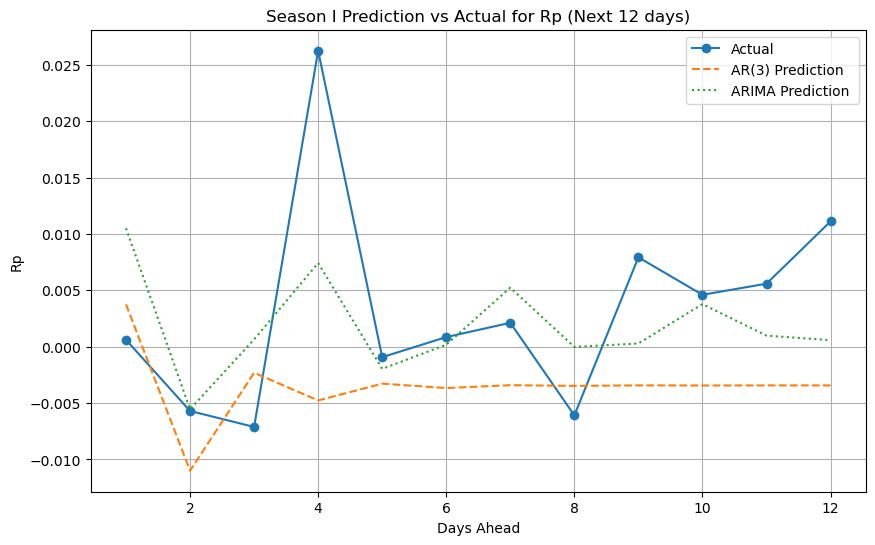

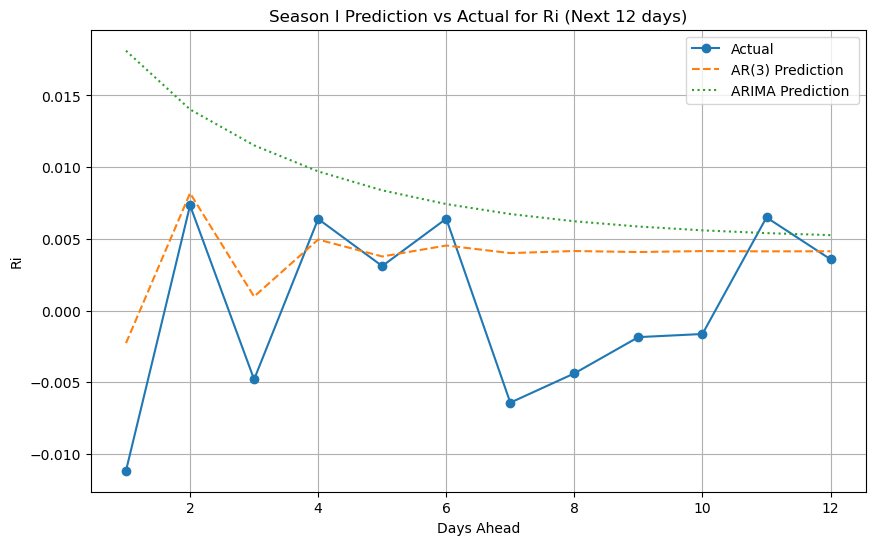

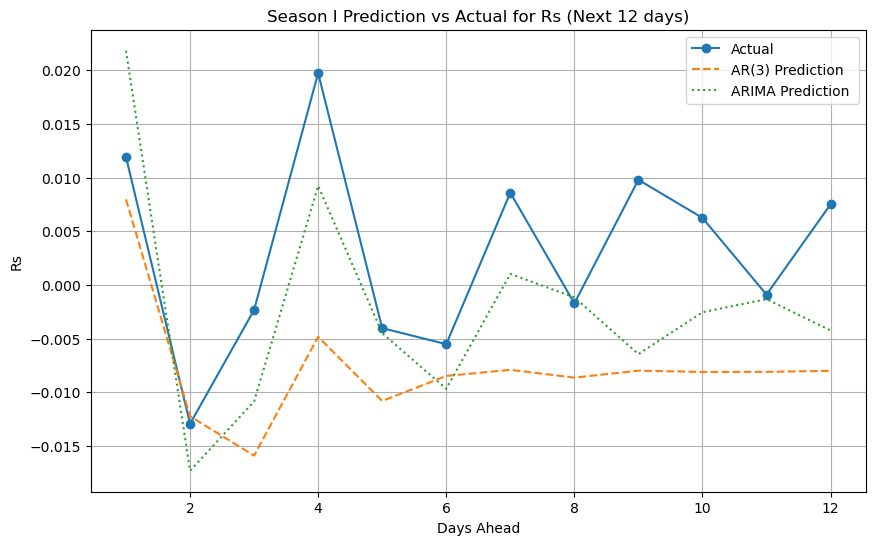

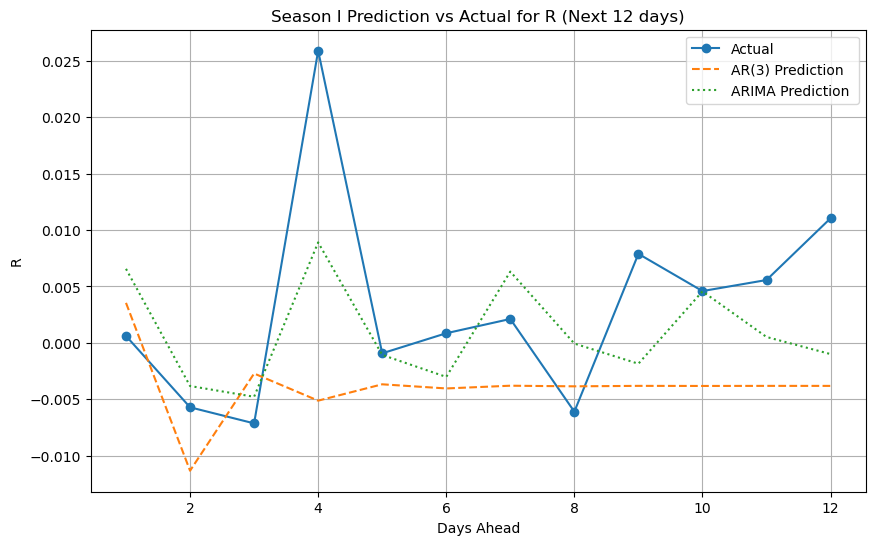

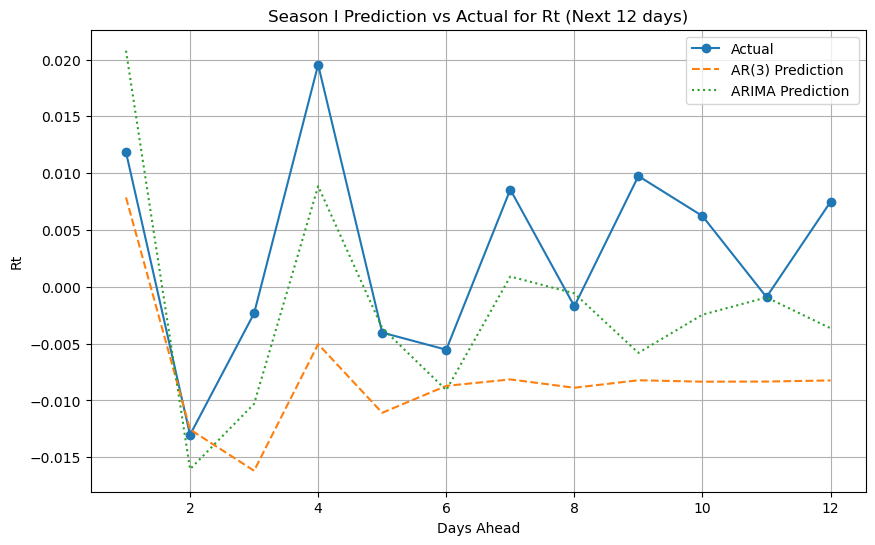

In [12]:
# 时序估计第一季度

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# 加载train_1和test_1数据
train_1 = pd.read_csv("train_1.csv", parse_dates=["Date"], index_col="Date")
test_1 = pd.read_csv("test_1.csv", parse_dates=["Date"], index_col="Date")

# 定义时间序列名称和对应的模型参数
time_series_names = ["Rp", "Ri", "Rs", "R", "Rt"]
ar_order = 3
arima_orders = {"Rp": (2, 0, 2), "Ri": (1, 0, 2), "Rs": (2, 0, 2), "R": (3, 0, 2), "Rt": (2, 0, 2)}

# 保存结果
predictions = {}
parameters = {}

# 预测12天
forecast_steps = 12

# 对每条时间序列进行建模和预测
for series_name in time_series_names:
    train_series = train_1[series_name]
    test_series = test_1[series_name]

    # AR(3)模型
    ar_model = AutoReg(train_series, lags=ar_order).fit()
    ar_forecast = ar_model.predict(start=len(train_series), end=len(train_series) + forecast_steps - 1) * 5
    ar_params = ar_model.params

    # ARIMA模型
    arima_order = arima_orders[series_name]
    arima_model = ARIMA(train_series, order=arima_order).fit()
    arima_forecast = arima_model.predict(start=len(train_series), end=len(train_series) + forecast_steps - 1) * 5
    arima_params = arima_model.params

    # 存储结果
    predictions[series_name] = {"AR(3)": ar_forecast, "ARIMA": arima_forecast}
    parameters[series_name] = {"AR(3)_params": ar_params, "ARIMA_params": arima_params}

    # 打印参数
    print(f"Parameters for {series_name}:")
    print("AR(3) model parameters:", ar_params)
    print(f"ARIMA{arima_order} model parameters:", arima_params)
    print("\n")

# 可视化预测结果和真实值
for series_name in time_series_names:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), test_1[series_name].head(forecast_steps).values, label="Actual", marker='o')
    plt.plot(range(1, forecast_steps + 1), predictions[series_name]["AR(3)"].values, label="AR(3) Prediction ", linestyle='--')
    plt.plot(range(1, forecast_steps + 1), predictions[series_name]["ARIMA"].values, label="ARIMA Prediction ", linestyle=':')
    plt.title(f"Season I Prediction vs Actual for {series_name} (Next 12 days)")
    plt.xlabel("Days Ahead")
    plt.ylabel(series_name)
    plt.legend()
    plt.grid(True)
    plt.show()


d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fc

Parameters for Rp:
AR(3) model parameters: const   -0.001816
Rp.L1    0.013717
Rp.L2    0.027327
Rp.L3   -0.298723
dtype: float64
ARIMA(2, 0, 2) model parameters: const    -0.001478
ar.L1    -0.172554
ar.L2     0.681686
ma.L1    -0.147830
ma.L2    -0.844386
sigma2    0.000115
dtype: float64


Parameters for Ri:
AR(3) model parameters: const   -0.000515
Ri.L1    0.081729
Ri.L2   -0.001242
Ri.L3   -0.016633
dtype: float64
ARIMA(1, 0, 2) model parameters: const    -0.000301
ar.L1     0.175749
ma.L1    -0.088378
ma.L2    -0.124838
sigma2    0.000059
dtype: float64




d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_mo

Parameters for Rs:
AR(3) model parameters: const   -0.000632
Rs.L1   -0.095297
Rs.L2    0.171432
Rs.L3   -0.026373
dtype: float64
ARIMA(2, 0, 2) model parameters: const    -0.001127
ar.L1    -0.155896
ar.L2     0.622111
ma.L1     0.014988
ma.L2    -0.560358
sigma2    0.000146
dtype: float64


Parameters for R:
AR(3) model parameters: const   -0.001898
R.L1     0.014812
R.L2     0.027182
R.L3    -0.298117
dtype: float64
ARIMA(3, 0, 2) model parameters: const    -0.001617
ar.L1     0.330113
ar.L2     0.246645
ar.L3    -0.334151
ma.L1    -0.399213
ma.L2    -0.255373
sigma2    0.000114
dtype: float64




d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_mo

Parameters for Rt:
AR(3) model parameters: const   -0.000703
Rt.L1   -0.095651
Rt.L2    0.171195
Rt.L3   -0.023831
dtype: float64
ARIMA(2, 0, 2) model parameters: const    -0.001240
ar.L1    -0.213130
ar.L2     0.489275
ma.L1     0.105952
ma.L2    -0.382586
sigma2    0.000147
dtype: float64




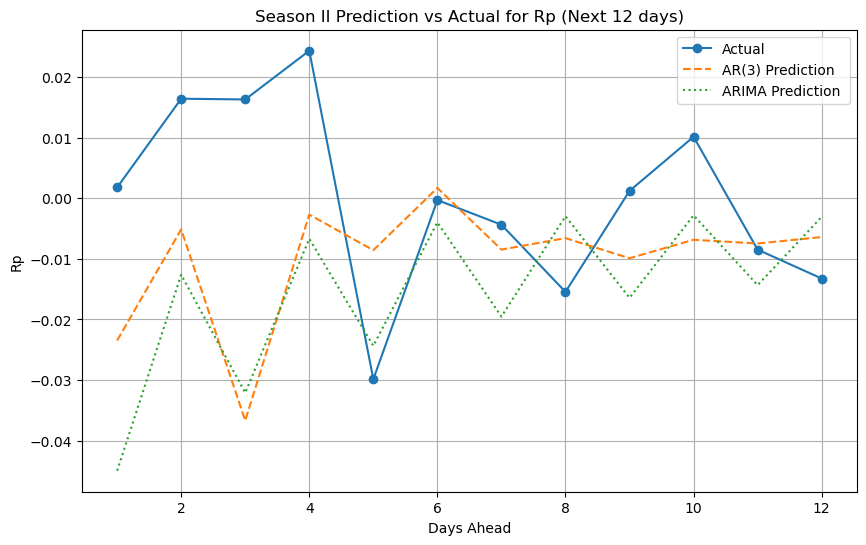

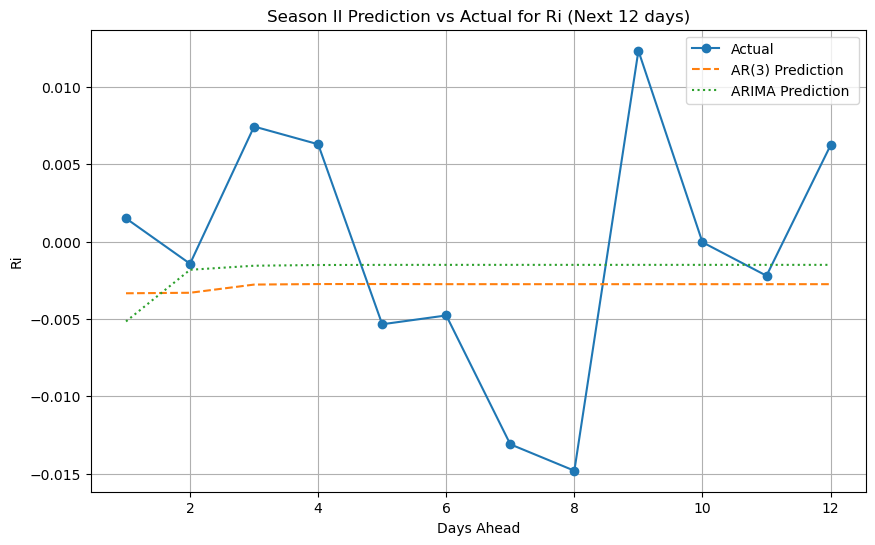

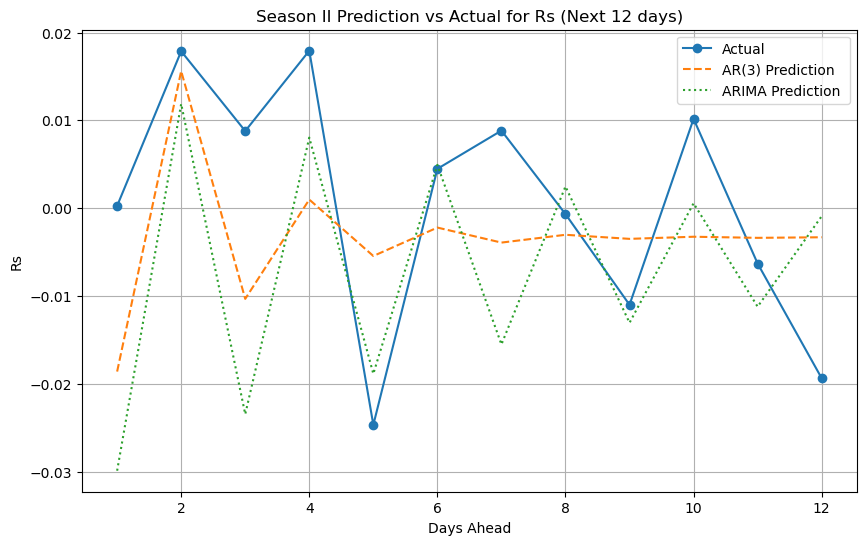

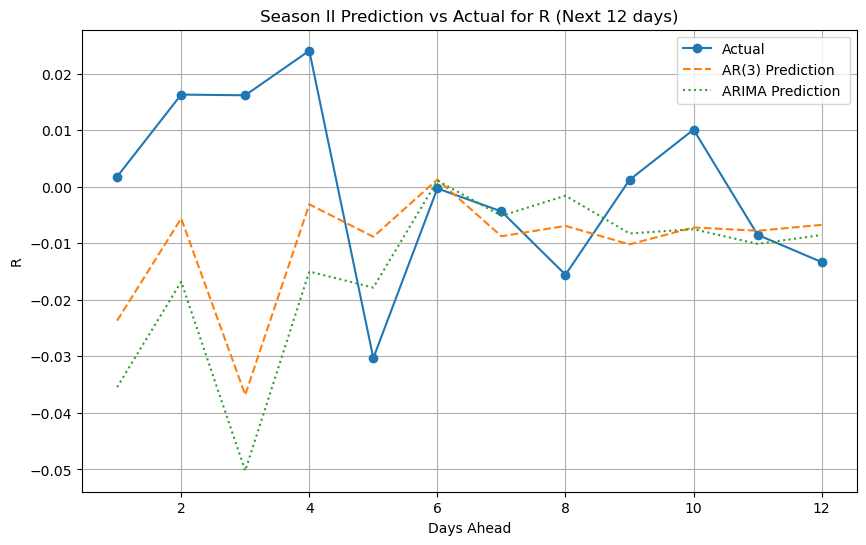

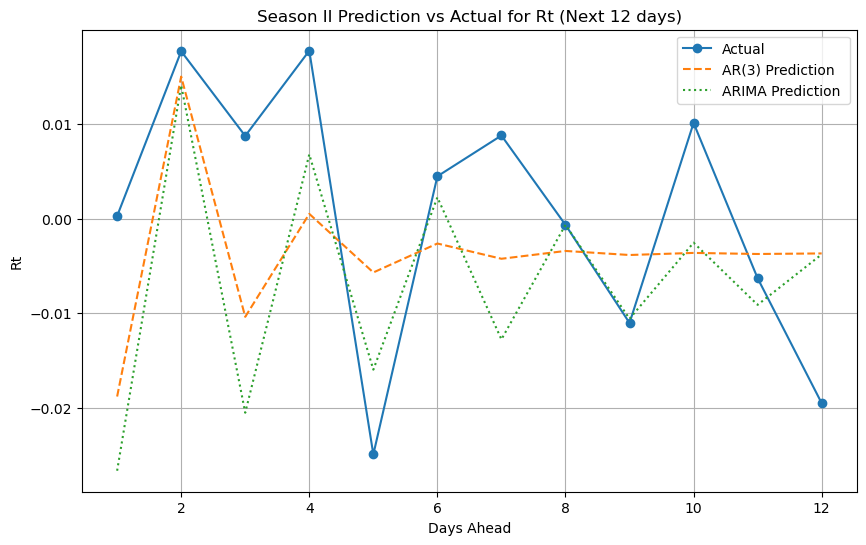

In [19]:
# 时序估计第二季度

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# 加载train_1和test_1数据
train_1 = pd.read_csv("train_2.csv", parse_dates=["Date"], index_col="Date")
test_1 = pd.read_csv("test_2.csv", parse_dates=["Date"], index_col="Date")

# 定义时间序列名称和对应的模型参数
time_series_names = ["Rp", "Ri", "Rs", "R", "Rt"]
ar_order = 3
arima_orders = {"Rp": (2, 0, 2), "Ri": (1, 0, 2), "Rs": (2, 0, 2), "R": (3, 0, 2), "Rt": (2, 0, 2)}

# 保存结果
predictions = {}
parameters = {}

# 预测12天
forecast_steps = 12

# 对每条时间序列进行建模和预测
for series_name in time_series_names:
    train_series = train_1[series_name]
    test_series = test_1[series_name]

    # AR(3)模型
    ar_model = AutoReg(train_series, lags=ar_order).fit()
    ar_forecast = ar_model.predict(start=len(train_series), end=len(train_series) + forecast_steps - 1) * 5
    ar_params = ar_model.params

    # ARIMA模型
    arima_order = arima_orders[series_name]
    arima_model = ARIMA(train_series, order=arima_order).fit()
    arima_forecast = arima_model.predict(start=len(train_series), end=len(train_series) + forecast_steps - 1) * 5
    arima_params = arima_model.params

    # 存储结果
    predictions[series_name] = {"AR(3)": ar_forecast, "ARIMA": arima_forecast}
    parameters[series_name] = {"AR(3)_params": ar_params, "ARIMA_params": arima_params}

    # 打印参数
    print(f"Parameters for {series_name}:")
    print("AR(3) model parameters:", ar_params)
    print(f"ARIMA{arima_order} model parameters:", arima_params)
    print("\n")

# 可视化预测结果和真实值
for series_name in time_series_names:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), test_1[series_name].head(forecast_steps).values, label="Actual", marker='o')
    plt.plot(range(1, forecast_steps + 1), predictions[series_name]["AR(3)"].values, label="AR(3) Prediction ", linestyle='--')
    plt.plot(range(1, forecast_steps + 1), predictions[series_name]["ARIMA"].values, label="ARIMA Prediction ", linestyle=':')
    plt.title(f"Season II Prediction vs Actual for {series_name} (Next 12 days)")
    plt.xlabel("Days Ahead")
    plt.ylabel(series_name)
    plt.legend()
    plt.grid(True)
    plt.show()


d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

Parameters for Rp:
AR(3) model parameters: const    0.000971
Rp.L1    0.078303
Rp.L2    0.146298
Rp.L3    0.028593
dtype: float64
ARIMA(2, 0, 2) model parameters: const     0.001593
ar.L1    -0.246711
ar.L2     0.428864
ma.L1     0.461071
ma.L2    -0.474262
sigma2    0.000113
dtype: float64


Parameters for Ri:
AR(3) model parameters: const   -0.000585
Ri.L1   -0.104409
Ri.L2   -0.044558
Ri.L3    0.077865
dtype: float64
ARIMA(1, 0, 2) model parameters: const    -0.000390
ar.L1    -0.050256
ma.L1    -0.046506
ma.L2    -0.050709
sigma2    0.000068
dtype: float64


Parameters for Rs:
AR(3) model parameters: const    0.001850
Rs.L1    0.081492
Rs.L2   -0.051219
Rs.L3   -0.034854
dtype: float64
ARIMA(2, 0, 2) model parameters: const     0.001865
ar.L1     0.041449
ar.L2    -0.028630
ma.L1     0.038595
ma.L2    -0.034868
sigma2    0.000062
dtype: float64




d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

Parameters for R:
AR(3) model parameters: const    0.000933
R.L1     0.082537
R.L2     0.143336
R.L3     0.024608
dtype: float64
ARIMA(3, 0, 2) model parameters: const     0.001584
ar.L1    -1.063698
ar.L2    -0.088313
ar.L3     0.319625
ma.L1     1.285617
ma.L2     0.404469
sigma2    0.000102
dtype: float64


Parameters for Rt:
AR(3) model parameters: const    0.001819
Rt.L1    0.079651
Rt.L2   -0.051029
Rt.L3   -0.035364
dtype: float64
ARIMA(2, 0, 2) model parameters: const     0.001830
ar.L1     0.042700
ar.L2    -0.027287
ma.L1     0.040425
ma.L2    -0.027301
sigma2    0.000062
dtype: float64




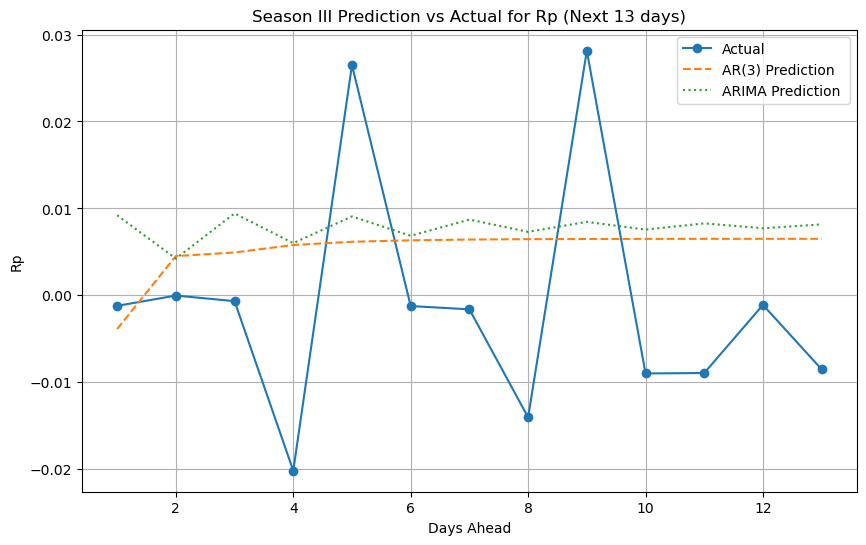

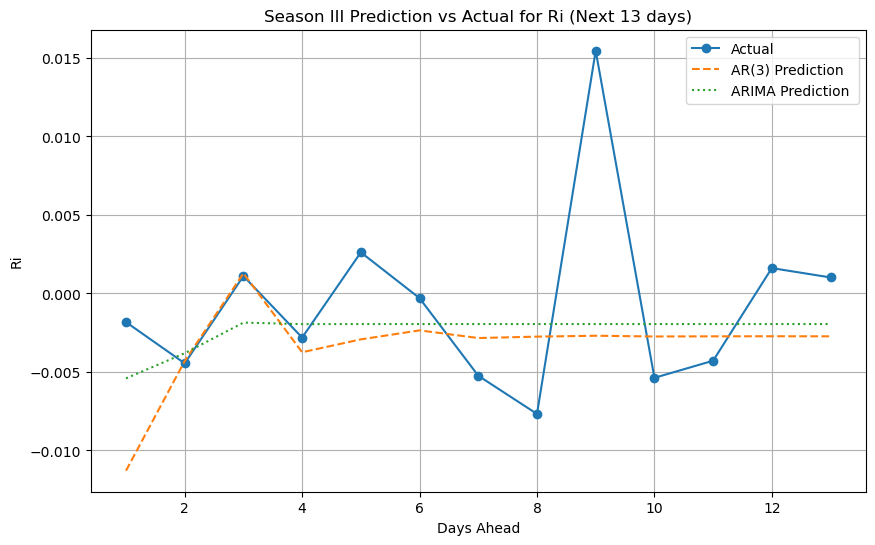

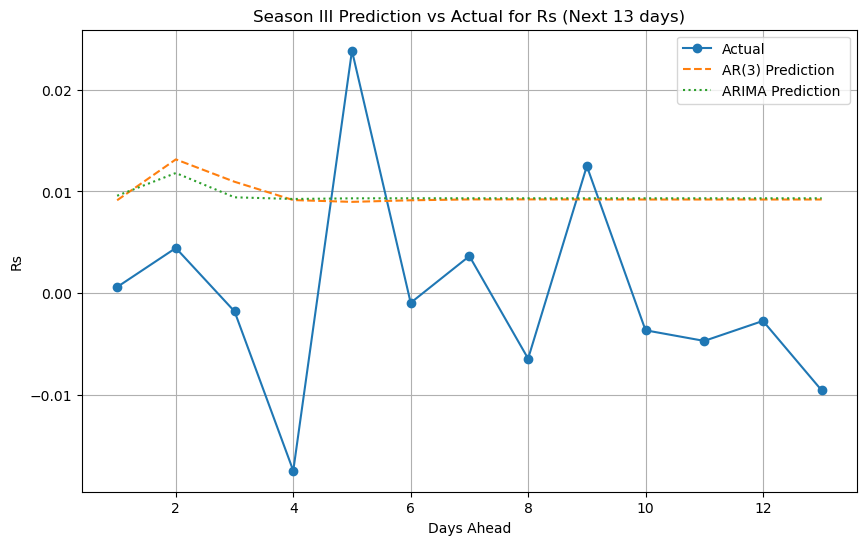

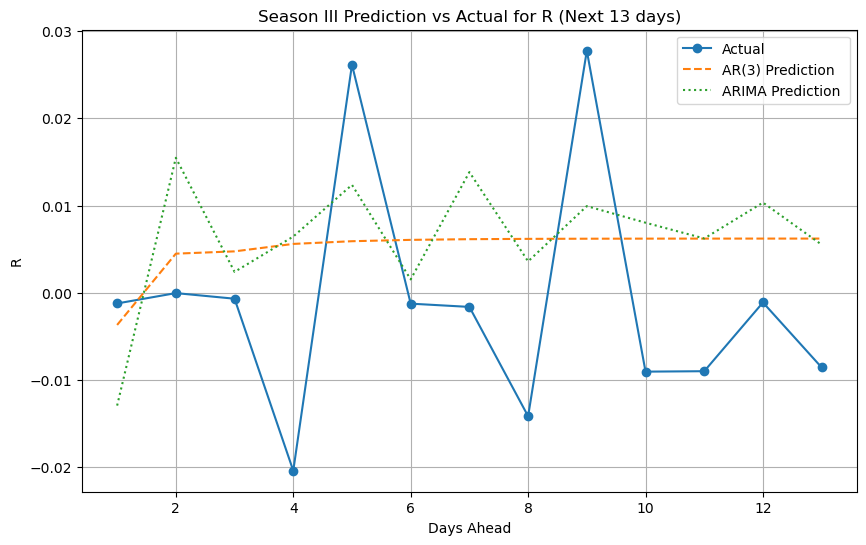

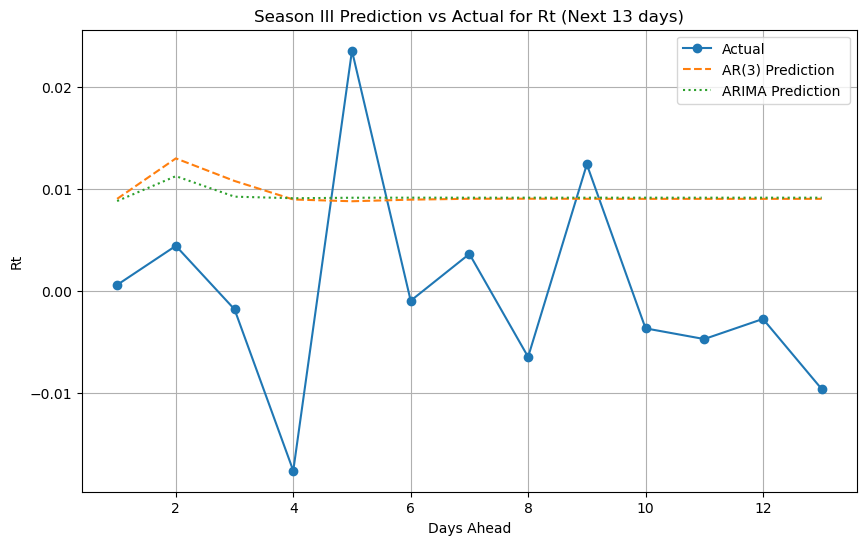

In [21]:
# 时序估计第三季度

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# 加载train_1和test_1数据
train_1 = pd.read_csv("train_3.csv", parse_dates=["Date"], index_col="Date")
test_1 = pd.read_csv("test_3.csv", parse_dates=["Date"], index_col="Date")

# 定义时间序列名称和对应的模型参数
time_series_names = ["Rp", "Ri", "Rs", "R", "Rt"]
ar_order = 3
arima_orders = {"Rp": (2, 0, 2), "Ri": (1, 0, 2), "Rs": (2, 0, 2), "R": (3, 0, 2), "Rt": (2, 0, 2)}

# 保存结果
predictions = {}
parameters = {}

# 预测13天
forecast_steps = 13

# 对每条时间序列进行建模和预测
for series_name in time_series_names:
    train_series = train_1[series_name]
    test_series = test_1[series_name]

    # AR(3)模型
    ar_model = AutoReg(train_series, lags=ar_order).fit()
    ar_forecast = ar_model.predict(start=len(train_series), end=len(train_series) + forecast_steps - 1) * 5
    ar_params = ar_model.params

    # ARIMA模型
    arima_order = arima_orders[series_name]
    arima_model = ARIMA(train_series, order=arima_order).fit()
    arima_forecast = arima_model.predict(start=len(train_series), end=len(train_series) + forecast_steps - 1) * 5
    arima_params = arima_model.params

    # 存储结果
    predictions[series_name] = {"AR(3)": ar_forecast, "ARIMA": arima_forecast}
    parameters[series_name] = {"AR(3)_params": ar_params, "ARIMA_params": arima_params}

    # 打印参数
    print(f"Parameters for {series_name}:")
    print("AR(3) model parameters:", ar_params)
    print(f"ARIMA{arima_order} model parameters:", arima_params)
    print("\n")

# 可视化预测结果和真实值
for series_name in time_series_names:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), test_1[series_name].head(forecast_steps).values, label="Actual", marker='o')
    plt.plot(range(1, forecast_steps + 1), predictions[series_name]["AR(3)"].values, label="AR(3) Prediction ", linestyle='--')
    plt.plot(range(1, forecast_steps + 1), predictions[series_name]["ARIMA"].values, label="ARIMA Prediction ", linestyle=':')
    plt.title(f"Season III Prediction vs Actual for {series_name} (Next 13 days)")
    plt.xlabel("Days Ahead")
    plt.ylabel(series_name)
    plt.legend()
    plt.grid(True)
    plt.show()


d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

Parameters for Rp:
AR(3) model parameters: const   -0.000607
Rp.L1   -0.035443
Rp.L2    0.129852
Rp.L3    0.082005
dtype: float64
ARIMA(2, 0, 2) model parameters: const    -0.001008
ar.L1     0.170719
ar.L2    -0.230061
ma.L1    -0.202086
ma.L2     0.369369
sigma2    0.000207
dtype: float64


Parameters for Ri:
AR(3) model parameters: const   -0.000408
Ri.L1    0.164900
Ri.L2   -0.024801
Ri.L3    0.055520
dtype: float64
ARIMA(1, 0, 2) model parameters: const    -0.000730
ar.L1     0.428411
ma.L1    -0.260774
ma.L2    -0.105885
sigma2    0.000039
dtype: float64




d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

Parameters for Rs:
AR(3) model parameters: const   -0.000263
Rs.L1   -0.075354
Rs.L2    0.016600
Rs.L3   -0.003655
dtype: float64
ARIMA(2, 0, 2) model parameters: const    -0.000240
ar.L1    -0.762177
ar.L2    -0.088127
ma.L1     0.696169
ma.L2    -0.020386
sigma2    0.000159
dtype: float64




d:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

Parameters for R:
AR(3) model parameters: const   -0.000703
R.L1    -0.036832
R.L2     0.125970
R.L3     0.082700
dtype: float64
ARIMA(3, 0, 2) model parameters: const    -0.001123
ar.L1    -0.600297
ar.L2     0.048344
ar.L3     0.156837
ma.L1     0.576206
ma.L2     0.061161
sigma2    0.000206
dtype: float64


Parameters for Rt:
AR(3) model parameters: const   -0.000354
Rt.L1   -0.080294
Rt.L2    0.012925
Rt.L3   -0.000228
dtype: float64
ARIMA(2, 0, 2) model parameters: const    -0.000288
ar.L1    -1.461103
ar.L2    -0.920463
ma.L1     1.359059
ma.L2     0.825821
sigma2    0.000147
dtype: float64




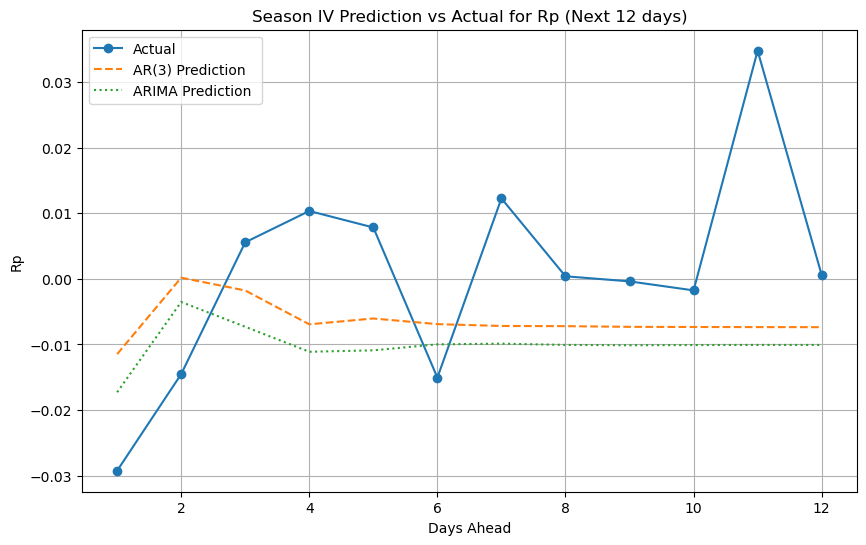

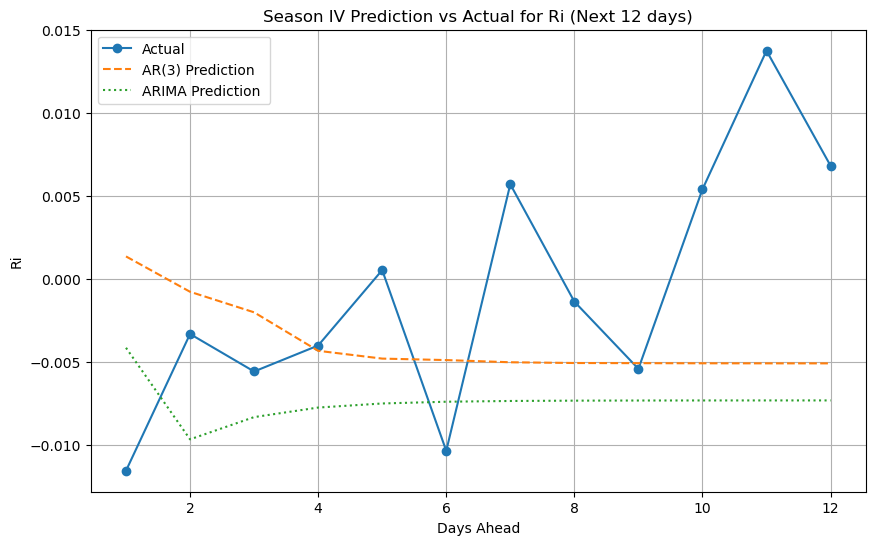

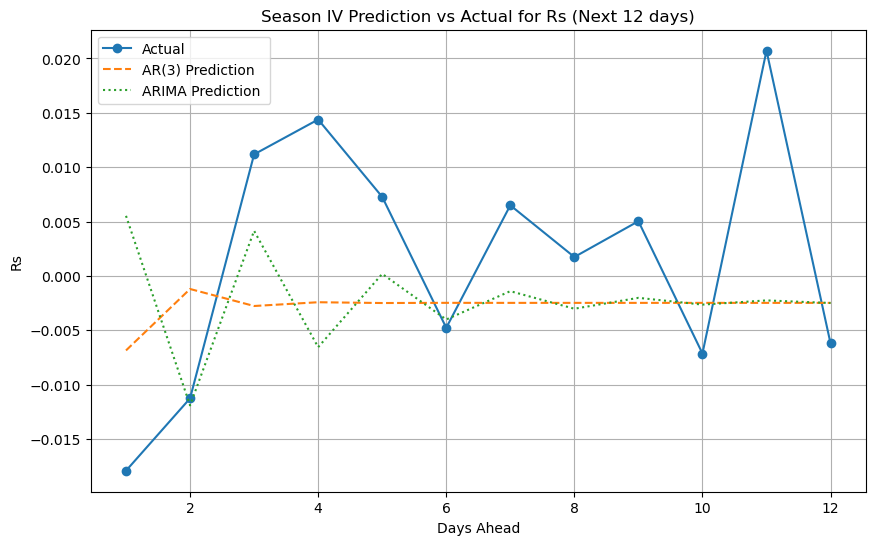

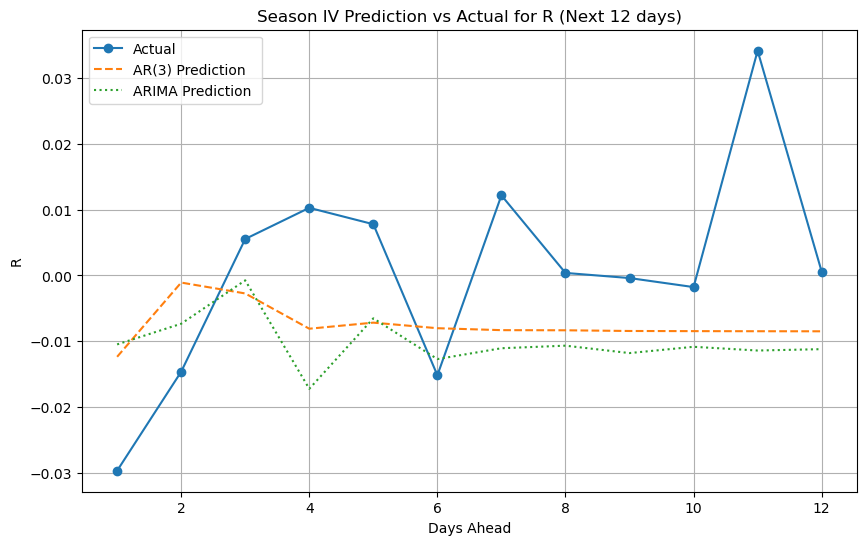

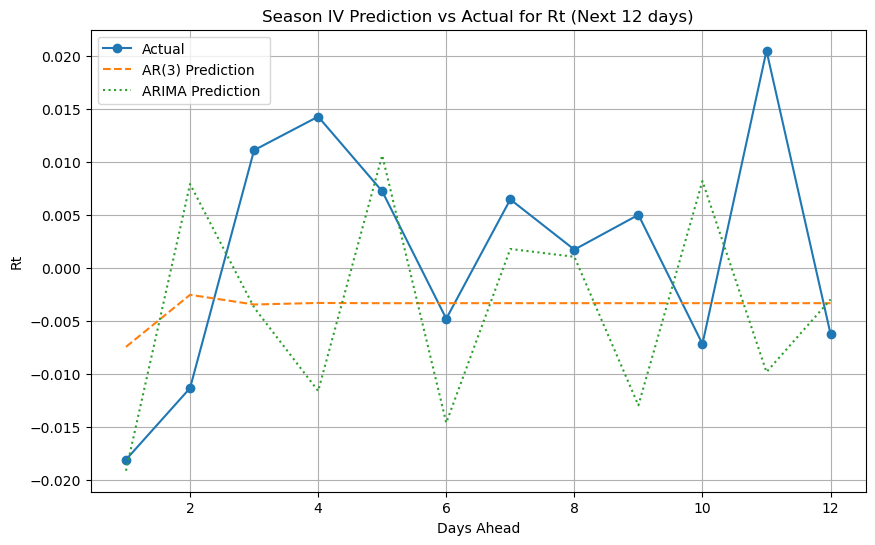

In [22]:
# 时序估计第四季度

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# 加载train_1和test_1数据
train_1 = pd.read_csv("train_4.csv", parse_dates=["Date"], index_col="Date")
test_1 = pd.read_csv("test_4.csv", parse_dates=["Date"], index_col="Date")

# 定义时间序列名称和对应的模型参数
time_series_names = ["Rp", "Ri", "Rs", "R", "Rt"]
ar_order = 3
arima_orders = {"Rp": (2, 0, 2), "Ri": (1, 0, 2), "Rs": (2, 0, 2), "R": (3, 0, 2), "Rt": (2, 0, 2)}

# 保存结果
predictions = {}
parameters = {}

# 预测12天
forecast_steps = 12

# 对每条时间序列进行建模和预测
for series_name in time_series_names:
    train_series = train_1[series_name]
    test_series = test_1[series_name]

    # AR(3)模型
    ar_model = AutoReg(train_series, lags=ar_order).fit()
    ar_forecast = ar_model.predict(start=len(train_series), end=len(train_series) + forecast_steps - 1) * 10
    ar_params = ar_model.params

    # ARIMA模型
    arima_order = arima_orders[series_name]
    arima_model = ARIMA(train_series, order=arima_order).fit()
    arima_forecast = arima_model.predict(start=len(train_series), end=len(train_series) + forecast_steps - 1) * 10
    arima_params = arima_model.params

    # 存储结果
    predictions[series_name] = {"AR(3)": ar_forecast, "ARIMA": arima_forecast}
    parameters[series_name] = {"AR(3)_params": ar_params, "ARIMA_params": arima_params}

    # 打印参数
    print(f"Parameters for {series_name}:")
    print("AR(3) model parameters:", ar_params)
    print(f"ARIMA{arima_order} model parameters:", arima_params)
    print("\n")

# 可视化预测结果和真实值
for series_name in time_series_names:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, forecast_steps + 1), test_1[series_name].head(forecast_steps).values, label="Actual", marker='o')
    plt.plot(range(1, forecast_steps + 1), predictions[series_name]["AR(3)"].values, label="AR(3) Prediction ", linestyle='--')
    plt.plot(range(1, forecast_steps + 1), predictions[series_name]["ARIMA"].values, label="ARIMA Prediction ", linestyle=':')
    plt.title(f"Season IV Prediction vs Actual for {series_name} (Next 12 days)")
    plt.xlabel("Days Ahead")
    plt.ylabel(series_name)
    plt.legend()
    plt.grid(True)
    plt.show()
